<a href="https://colab.research.google.com/github/silent-ai/chessboard/blob/main/nbs/chessboard_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
! pip install fastai --upgrade > /dev/null

     |████████████████████████████████| 194kB 8.4MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 


In [2]:
from fastai.vision.all import *

## Download data from github

In [3]:
from zipfile import ZipFile as unzip
path = Path('data')

#with unzip(download_data('https://tinyurl.com/silentai'), 'r') as ref:
 #   ref.extractall(path)

In [4]:
with unzip(download_data('https://github.com/silent-ai/chessboard/blob/main/data/small_amazon.zip?raw=true'), 'r') as ref:
    ref.extractall(path)

## Get annotations

In [5]:
import json
with open(path/'annotations'/'instances_default.json') as f:
  codes = json.load(f)

In [6]:
# Join the images to their label by id
img = {img['id']: img['file_name'] for img in codes['images']}
ann = {img['id']: img['segmentation'][0] for img in codes['annotations']}
labels = {img[id]: list(zip(a[::2], a[1::2])) for id, a in ann.items()}

# Grab the first example
first(labels.items())

('PXL_20201202_184115342_RESIZE.jpg',
 [(1031.89, 100.85), (685.6, 531.25), (925.34, 1086.42), (1424.43, 734.53)])

In [7]:
def get_label(f): return tensor(labels[f.name])

In [12]:
get_label(path/'images'/'PXL_20201202_183829674_RESIZE.jpg')

img_files = get_image_files(path)
#def img2pose(x): return Path(f'{str(x)[:-7]}pose.txt')
#img2pose(img_files[0])
example = img_files[0]
Image.open(example), get_label(example)

for x in img_files:
  print(Image.open(x).size)

(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)
(2016, 1134)


## Datablock API

In [9]:
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_label,
    #item_tfms=Resize(320),
    batch_tfms=[Normalize.from_stats(*imagenet_stats)]
)


In [9]:

#imgs = get_image_files(path/'content/chessboard/data/chessboard_images')
#def overwriter(fname): return 'chessboard'
#lambda is like def but anonomous 
chess = DataBlock(
    #TensorCategory(0) is type for Category
    blocks=(ImageBlock, PointBlock),
    splitter=RandomSplitter(),
    get_items=get_image_files,
    
    #get image file output passed into overwriter call
    #ML: x is input, y is label
    get_y= get_label,
    
    #specify validation set
    
    

    #specify item transformations
    #item_tfms=RatioResize(240),
    batch_tfms=[Normalize.from_stats(*imagenet_stats)]
    
)



In [11]:
chessboard_dls = chess.dataloaders(path, bs=4)

chessboard_dls.train.items

[Path('data/images/PXL_20201202_183949020_RESIZE.jpg'),
 Path('data/images/PXL_20201202_184006554_RESIZE.jpg'),
 Path('data/images/PXL_20201202_184004069_RESIZE.jpg'),
 Path('data/images/PXL_20201202_183914396_RESIZE.jpg'),
 Path('data/images/PXL_20201202_183921765_RESIZE.jpg'),
 Path('data/images/PXL_20201202_183925702_RESIZE.jpg'),
 Path('data/images/PXL_20201202_183911727_RESIZE.jpg'),
 Path('data/images/PXL_20201202_183829674_RESIZE.jpg'),
 Path('data/images/PXL_20201202_183959144_RESIZE.jpg'),
 Path('data/images/PXL_20201202_184109053_RESIZE.jpg'),
 Path('data/images/PXL_20201202_183852283_RESIZE.jpg'),
 Path('data/images/PXL_20201202_183903255_RESIZE.jpg'),
 Path('data/images/PXL_20201202_183857507_RESIZE.jpg'),
 Path('data/images/PXL_20201202_183915951_RESIZE.jpg'),
 Path('data/images/PXL_20201202_183900643_RESIZE.jpg'),
 Path('data/images/PXL_20201202_183844446_RESIZE.jpg'),
 Path('data/images/PXL_20201202_184115342_RESIZE.jpg'),
 Path('data/images/PXL_20201202_183902097_RESIZE

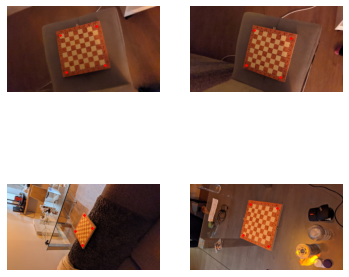

In [12]:
chessboard_dls.show_batch()

In [13]:
chesslearn = cnn_learner(chessboard_dls, resnet34)
#n out is number of categories out 
#res34 is arch which has been pretrained already so has classifications like man, dog, frog

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [14]:
chesslearn.lr_find()

KeyError: ignored

In [40]:
chesslearn.fine_tune(3, 2e-6)

epoch,train_loss,valid_loss,time
0,3.606020,4.513556,00:08


epoch,train_loss,valid_loss,time
0,3.892371,1.705735,00:10
1,3.973884,1.601220,00:10
2,4.139575,1.612518,00:10


In [43]:
chesslearn.fit_one_cycle(3,2e-6)

epoch,train_loss,valid_loss,time
0,3.567646,3.530913,00:08
1,3.922869,1.090052,00:08
2,3.963526,1.167647,00:08


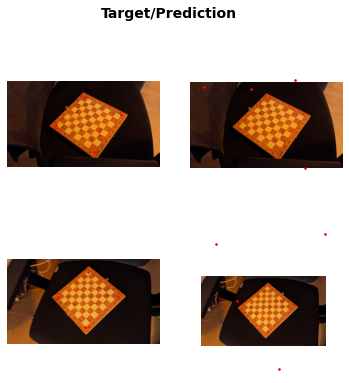

In [44]:
chesslearn.show_results()

In [ ]:
dls = biwi.dataloaders(path/'content', bs=4)
dls.show_batch(max_n=9, figsize=(8,6))

## Train

In [ ]:
learn = cnn_learner(dls, resnet18, y_range=(-1,1))

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(3, 5e-2)

In [ ]:
learn.show_results()